True
{'Flora Price': 1.0, 'Nora Fayette': 0.75, 'E10': 1.0, 'Verne Sanderson': 1.0, 'E12': 1.0, 'E14': 1.0, 'Frances Anderson': 1.0, 'Dorothy Murchison': 1.0, 'Evelyn Jefferson': 0.9642857142857143, 'Ruth DeSand': 1.0, 'Helen Lloyd': 0.9, 'Olivia Carleton': 1.0, 'Eleanor Nye': 1.0, 'E11': 0.6666666666666666, 'E9': 0.7121212121212122, 'E8': 0.8021978021978022, 'E5': 1.0, 'E4': 1.0, 'E7': 0.9111111111111111, 'E6': 0.9642857142857143, 'E1': 1.0, 'Myra Liddel': 1.0, 'E3': 1.0, 'E2': 1.0, 'Theresa Anderson': 1.0, 'Pearl Oglethorpe': 1.0, 'Katherina Rogers': 1.0, 'Brenda Rogers': 1.0, 'E13': 1.0, 'Charlotte McDowd': 1.0, 'Sylvia Avondale': 1.0, 'Laura Mandeville': 1.0}
0.958458381896
{'Flora Price': 0.2575066137566138, 'Nora Fayette': 0.26057667822373703, 'E10': 0.4033424908424909, 'Verne Sanderson': 0.3488328664799254, 'E12': 0.40144230769230776, 'E14': 0.3664772727272727, 'Frances Anderson': 0.31481721981721983, 'Dorothy Murchison': 0.30500992063492066, 'Evelyn Jefferson': 0.31794333117862

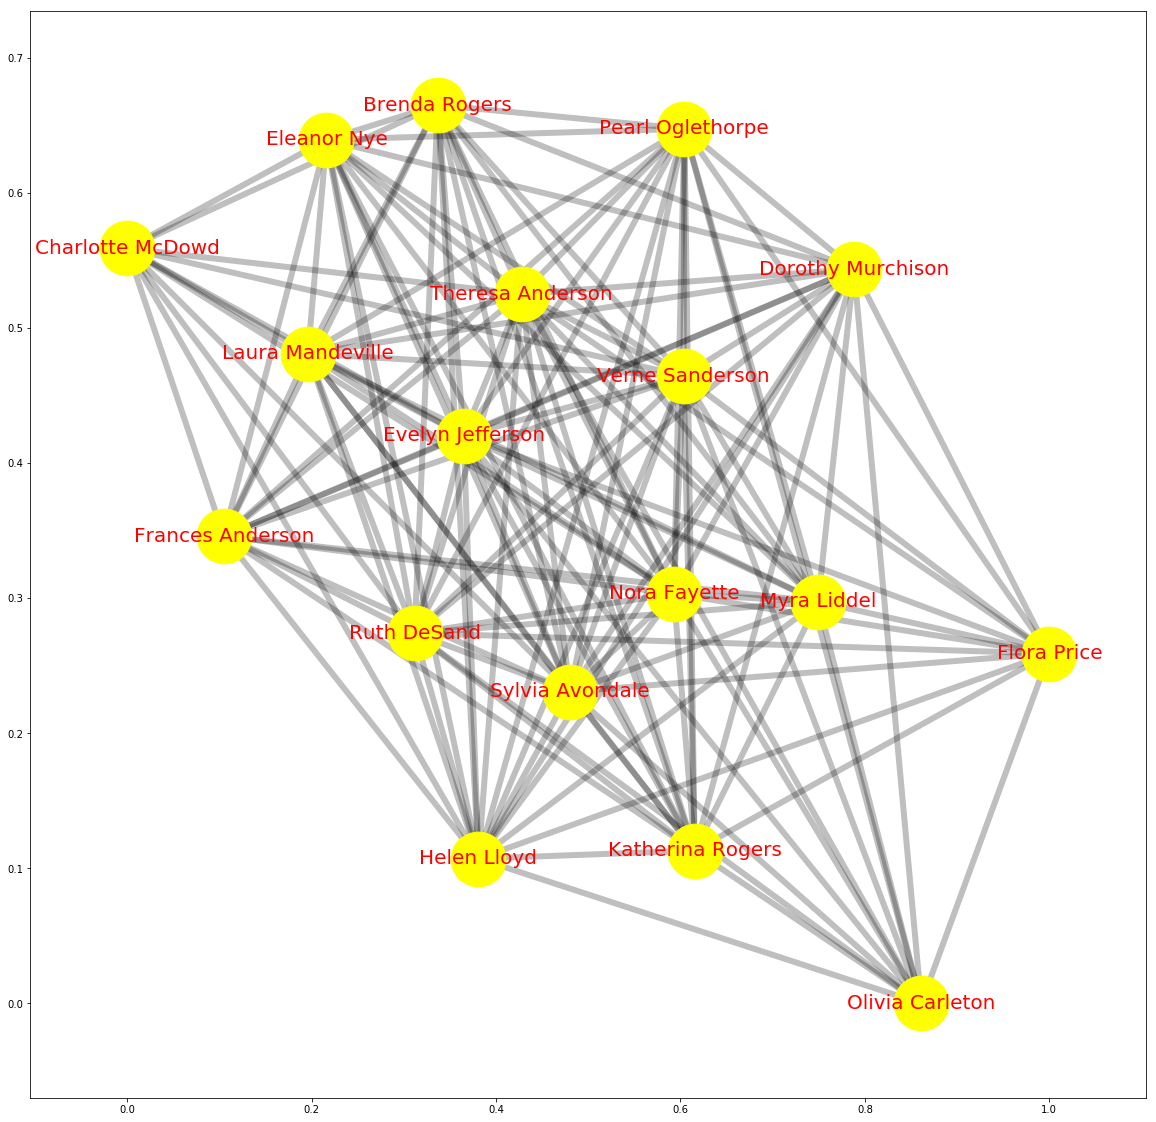

NameError: name 'degree' is not defined

In [4]:
import networkx as nx
import networkx.algorithms.bipartite as bipartite
import matplotlib.pyplot as plt
import matplotlib.colors as colors
from scipy import stats
import numpy as np
import math

G = nx.davis_southern_women_graph()
women = G.graph['top']
clubs = G.graph['bottom']
print(bipartite.is_bipartite(G))
rc = bipartite.node_redundancy(G)
print(bipartite.node_redundancy(G))
print(sum(rc.values()) / len(G))

c = bipartite.clustering(G)
print(bipartite.clustering(G))
print(bipartite.average_clustering(G))

print("Biadjacency matrix")
print(bipartite.biadjacency_matrix(G,women,clubs))

# project bipartite graph onto women nodes
W = bipartite.projected_graph(G, women)
print('')
print("#Friends, Member")
for w in women:
    print('%d %s' % (W.degree(w),w))

# project bipartite graph onto women nodes keeping number of co-occurence
# the degree computed is weighted and counts the total number of shared contacts
W = bipartite.weighted_projected_graph(G, women)
print('')
print("#Friend meetings, Member")
for w in women:
    print('%d %s' % (W.degree(w,weight='weight'),w))
    
pos = nx.spring_layout(W, k=.5,iterations=50)
nx.draw_networkx_labels(W,pos,font_size=20,font_family='sans-serif', font_color = "red")
 
nx.draw_networkx_edges(W,pos,alpha=0.25,width=6)
nx.draw_networkx_nodes(W,pos,node_size=3000, node_color='yellow')

plt.rcParams["figure.figsize"] = [20,20]
plt.show() #add block=True when save as .py
degree_centrality = nx.degree_centrality(W)
for key, value in sorted(degree.degree_centrality(), key=lambda (k,v): (v,k), reverse = True):
    print "%s: %s" % (key, value)
    

degree = nx.degree(W)
for key, value in sorted(degree.iteritems(), key=lambda (k,v): (v,k), reverse = True):
    print "%s: %s" % (key, value)
    

e = bipartite.projected_graph(G, clubs)

degree = nx.degree(e)
for key, value in sorted(degree.iteritems(), key=lambda (k,v): (v,k), reverse = True):
    print "%s: %s" % (key, value)
    

stats.mode(degree.values())[0][0]
np.mean(degree.values())
np.std(degree.values())


e1 = nx.ego_graph(G, "E1", radius=1, center=True, undirected=False, distance=None)